<a href="https://colab.research.google.com/github/sparsh-ai/Advanced-NLP-Projects-with-TensorFlow-2.0/blob/master/a88d2fcb_3f86_46b9_8a74_593614a34da7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#plt.style.use('fivethirtyeight')
plt.style.use('seaborn-notebook')
import warnings
warnings.filterwarnings('ignore')

from numpy import nan
import pandas.core.algorithms as algos
import scipy.stats.stats as stats
from pandas.io.json import json_normalize
import re
import traceback
import string
import sys
%precision 2
import gc
import os

# Print all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import datetime
import category_encoders as ce
from encoder import WOEEncoder

#other packages
import missingno as msno
from sklearn import tree
import graphviz
import eli5
from eli5.sklearn import PermutationImportance

# Machine learning libraries
from sklearn import metrics, preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, cross_validate

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier 
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier, BaggingClassifier

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, PassiveAggressiveClassifier
from sklearn.linear_model import SGDClassifier, RidgeClassifierCV, Perceptron
    
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel, RFE, RFECV, SelectKBest, chi2
import catboost
from pygam import LogisticGAM

# Clustering
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth, SpectralClustering
from hdbscan import HDBSCAN

#other packages
from sklearn import tree
import graphviz

# Versions
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

seaborn: 0.9.0
pandas: 0.23.4
numpy: 1.15.4
Python: 3.6.8 |Anaconda custom (64-bit)| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]


### Pre-preprocessing
- Loading .txt dataset with | ('pipe') seperator
- filtering out only 'Approved' and 'Denied' records

In [0]:
df = pd.read_csv('dataset2.txt', sep="|")
print('Initial data shape:',df.shape)

Initial data shape: (393550, 26)


In [0]:
df.describe(include='all')

,preauth_rqst_id,PREAUTH_RQST_TYPE_CD,CASE_TYPE_CD,PLACE_OF_SRVC_NM,RCPT_MTHD_TXT,DSCHG_DT,ADDNL_DSCHRG_DISP_INFO_TXT,DT_OF_BRTH,GNDR,ST,MBR_PLN_ST_CD,MBR_LOB_NM,PROD_FMLY_CD,FUNDG_TYPE_CD,PREAUTH_CASE_PROC_CD_ID,PROC_CD,PROC_MDFR_CD,PRMRY_IND,SRCV_QTY,TOS_NM,RVW_TYPE_TXT,LVL_OF_SRVC_NM,ADDNL_CLNCL_INFO_RCVD_TXT,PROC_CD_DCSN,STTS_RSN_TXT,DIAG_CD
count,3.935500e+05,393550,393550,393550.000000,393550,46478,3556,393550,393550,393531,393550,393550,353195,368092,3.935500e+05,379940,115917,379940.000000,393522.000000,393546,393546,393550.000000,36930,393550,393548.0,393550
unique,NaN,6,18,NaN,17,565,14,28479,2,59,52,5,10,3,NaN,7017,39,NaN,NaN,86,3,NaN,2,9,95.0,10290
top,NaN,Outpatient,SU,NaN,Phone,'2018-11-09 00:00:00',HOMEHLTHSERV,'1966-04-23 00:00:00',F,CA,CA,Local Commercial,PPO,ASO,NaN,G0299,RT,NaN,NaN,2,Prospective,NaN,Yes,APPRVD,1.0,F84.0
freq,NaN,321781,175580,NaN,208435,996,2369,106,221237,100266,118317,273109,247441,232350,NaN,8247,35110,NaN,NaN,179530,340793,NaN,36446,276447,203097.0,8840
mean,3.077292e+06,NaN,NaN,20.789020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.754206e+06,NaN,NaN,0.582337,44.946333,NaN,NaN,2.874443,NaN,NaN,NaN,NaN
std,1.828805e+05,NaN,NaN,13.983353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.853441e+05,NaN,NaN,0.493175,614.197215,NaN,NaN,0.353967,NaN,NaN,NaN,NaN
min,8.157590e+05,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.106139e+06,NaN,NaN,0.000000,-29.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,2.994111e+06,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.653745e+06,NaN,NaN,0.000000,1.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN
50%,3.092531e+06,NaN,NaN,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.764434e+06,NaN,NaN,1.000000,1.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN
75%,3.200418e+06,NaN,NaN,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.884838e+06,NaN,NaN,1.000000,3.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN



Shape after filtering only Approved/Denied cases: (325699, 26)


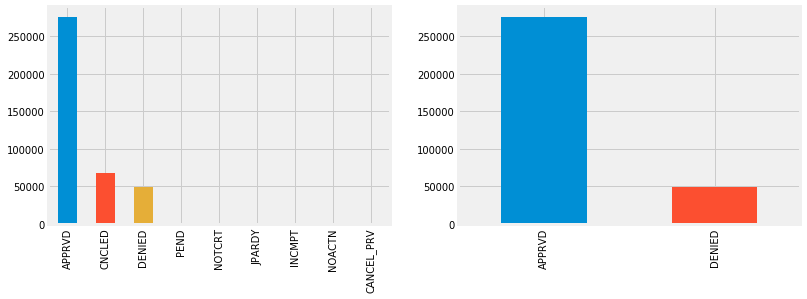

In [0]:
#target variable distribution - filtering only approved and reject cases
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

df['PROC_CD_DCSN'].value_counts().plot(kind='bar', ax=ax1)
df = df[df['PROC_CD_DCSN'].isin(['APPRVD','DENIED'])]
df['PROC_CD_DCSN'].value_counts().plot(kind='bar', ax=ax2)
df['PROC_CD_DCSN'] = df['PROC_CD_DCSN'].map({'APPRVD':1, 'DENIED':0})
print('\nShape after filtering only Approved/Denied cases:',df.shape)

## Class balancing
![title](img/resampling.png)
- Despite the advantage of balancing classes, these techniques also have their weaknesses (there is no free lunch). The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.
- Apart from under and over sampling, there is a very popular approach called SMOTE (Synthetic Minority Over-Sampling Technique), which is a combination of oversampling and undersampling, but the oversampling approach is not by replicating minority class but constructing new minority class data instance via an algorithm.
![title](img/smote.png)

#### https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [0]:
# import imblearn
# from imblearn.over_sampling import SMOTE

# def smote_me(data_X, data_y):
#     #We'll use ratio='minority' to resample the minority class
#     smote = SMOTE(ratio='minority')
#     X_sm, y_sm = smote.fit_sample(data_X, data_y)
#     return pd.DataFrame(X_sm), pd.Series(y_sm)

In [0]:
# Randomly sample 10% of your dataframe - temporary for faster processing (experimental purpose only)
df = df.sample(frac=0.01)

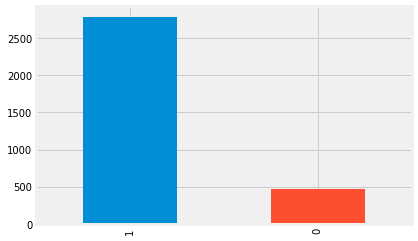

In [0]:
df['PROC_CD_DCSN'].value_counts().plot(kind='bar')

## EDA
1. Correcting and Completing features
 - Detecting and correcting outliers (Tukey method of IQR range)
 - Detecting and correcting missing values
 - Strategy (Metaframe)
     - Metaframe building, export to excel
     - missing-value strategy
     - outlier strategy
     - encoding strategy
     - variable description
     - DCG and client comments
2. Correlation analysis
 - Pearson for continuous-continuous
 - Kramer_v, theil-u for categorical-categorical
 - Coorelation ratio for categorical-continuous
3. Feature Selection/Elimination
 - SelectKBest (metric = chi2)
 - SelectFromModel (Random Forest, XGBoost _feature_importances_)
 - Information Value
 - Recursive Feature elimination
4. Multicollinearity Analysis
5. Univariate Analysis
 - Seaborn countplot of categorical variable with 'target_variable' hue
 - Seaborn kde-distplot of continuous variable with 'target_variable' hue
6. Bivariate Analysis

In [0]:
### Creating metaframe
def meta(data):
    datadict = []
    for col in data.columns:
        col_dict = {
            'varname': col,
            'dtype': data[col].dtype,
            'nunique': data[col].nunique(),
            'value_counts': data[col].value_counts(dropna = False),
            'response_rate': 100 * data[col].notnull().sum() / data.shape[0]
        }
        datadict.append(col_dict)

    meta = pd.DataFrame(datadict, columns=['varname', 'dtype', 'nunique', 'response_rate'])
    return meta

meta(df).sort_values(by='response_rate', ascending=False)

,varname,dtype,nunique,response_rate
0,preauth_rqst_id,int64,3216,100.000000
10,MBR_PLN_ST_CD,object,35,100.000000
24,STTS_RSN_TXT,object,52,100.000000
23,PROC_CD_DCSN,int64,2,100.000000
21,LVL_OF_SRVC_NM,int64,3,100.000000
20,RVW_TYPE_TXT,object,3,100.000000
19,TOS_NM,object,38,100.000000
14,PREAUTH_CASE_PROC_CD_ID,int64,3257,100.000000
1,PREAUTH_RQST_TYPE_CD,object,5,100.000000
11,MBR_LOB_NM,object,5,100.000000


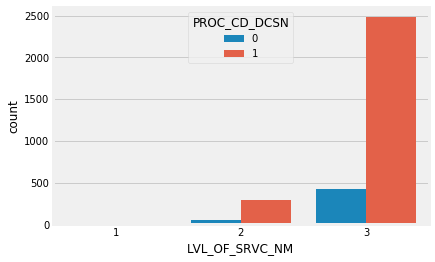

In [0]:
sns.countplot(x='LVL_OF_SRVC_NM', hue="PROC_CD_DCSN", data=df);

### train-test split

In [0]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]
print("After train-test split")
print(train.shape, test.shape)

After train-test split
(2573, 26) (684, 26)


### pre-processing

In [0]:
def pre_process(data):
    
    data = data.drop_duplicates(subset=['PREAUTH_CASE_PROC_CD_ID'], keep='first')
    
    #change - from date-of-birth to patient-age
    data['DT_OF_BRTH'] =  pd.to_datetime(data['DT_OF_BRTH'], format="'%Y-%m-%d %H:%M:%S'")
    data['patient_age'] = (datetime.datetime.now() - data['DT_OF_BRTH']).astype('<m8[Y]')
    data = data.drop('DT_OF_BRTH', axis=1)

    #combine 3 request_type INPATIENT categories into single category
    data['PREAUTH_RQST_TYPE_CD'] = data['PREAUTH_RQST_TYPE_CD'].replace(['Inpatient-Preservice', 'Inpatient-Continued Stay', 'Inpatient-Retrospective'], 'Inpatient')

    data = data.dropna(subset=['SRCV_QTY'], how='all')
    #data = data.dropna(subset=['RCPT_MTHD_TXT'], how='all')
    #data = data.dropna(subset=['RVW_TYPE_TXT'], how='all')
    data = data.dropna(subset=['ST'], how='all')
    #data = data.dropna(subset=['STTS_RSN_TXT'], how='all')
    #data = data.dropna(subset=['RVW_TYPE_TXT'], how='all')
    data = data.dropna(subset=['PROC_CD'], how='all')

    data['PRMRY_IND'] = data['PRMRY_IND'].fillna(0)
    #data['CASE_SpcLTY'] = data['CASE_SpcLTY'].fillna(0)
    #data['CASE_SpcLTY_DETAIL'] = data['CASE_SpcLTY_DETAIL'].fillna(0)
    #data['MBR_ELGBL_IND'] = data['MBR_ELGBL_IND'].fillna(1)

    data['FUNDG_TYPE_CD'] = data['FUNDG_TYPE_CD'].fillna('Not Known')
    data['PROD_FMLY_CD'] = data['PROD_FMLY_CD'].fillna('Not Known')

    data = data.drop('ADDNL_DSCHRG_DISP_INFO_TXT', axis=1)
    data = data.drop('ADDNL_CLNCL_INFO_RCVD_TXT', axis=1)
    data = data.drop('preauth_rqst_id', axis=1)
    data = data.drop('DSCHG_DT', axis=1)
    data = data.drop('PROC_MDFR_CD', axis=1)
    data = data.drop('PREAUTH_CASE_PROC_CD_ID', axis=1)
    data = data.drop('STTS_RSN_TXT', axis=1)


    #typecasting
    type_object = ['PLACE_OF_SRVC_NM', 'ST', 'MBR_PLN_ST_CD', 'PROC_CD', 'TOS_NM', 'LVL_OF_SRVC_NM', 'DIAG_CD']
    #type_object.append('STTS_RSN_TXT')
    data[type_object] = data[type_object].astype(object)

    #map-encoding
    data['GNDR'] = data['GNDR'].map({'F':1, 'M':0})
    #data['ADDNL_CLNCL_INFO_RCVD_TXT'] = data['ADDNL_CLNCL_INFO_RCVD_TXT'].map({'yes':1, 'no':0})
    
    return data

In [0]:
train = pre_process(train)
test = pre_process(test)
print("\nAfter pre-processing")
print(train.shape, test.shape)


After pre-processing
(2469, 19) (660, 19)


In [0]:
# Outlier detection 
def detect_outliers(df,col):
    outlier_indices = []
    Q1 = np.percentile(df[col],25)
    Q3 = np.percentile(df[col],75)
    IQR = Q3 - Q1
    outlier_step = 1.5 * IQR
    outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
    outlier_indices.extend(outlier_list_col)
    return outlier_indices

#detect_outliers(train,'SRCV_QTY')

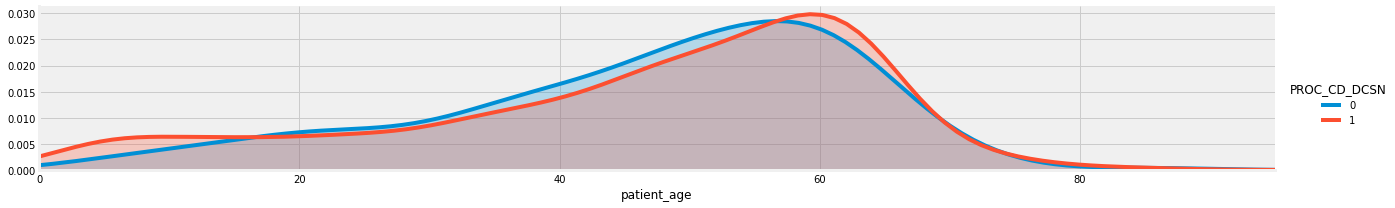

In [0]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid(train, hue = 'PROC_CD_DCSN', aspect=6 )
a.map(sns.kdeplot, 'patient_age', shade= True )
a.set(xlim=(0 , train['patient_age'].max()))
a.add_legend()

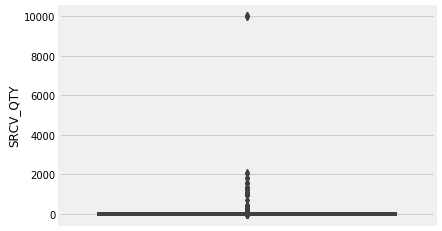

In [0]:
sns.boxplot(y=train['SRCV_QTY'])

In [0]:
meta(train).sort_values(by='response_rate', ascending=False)

,varname,dtype,nunique,response_rate
0,PREAUTH_RQST_TYPE_CD,object,3,100.0
10,PROC_CD,object,730,100.0
17,DIAG_CD,object,933,100.0
16,PROC_CD_DCSN,int64,2,100.0
15,LVL_OF_SRVC_NM,object,3,100.0
14,RVW_TYPE_TXT,object,3,100.0
13,TOS_NM,object,36,100.0
12,SRCV_QTY,float64,77,100.0
11,PRMRY_IND,float64,2,100.0
9,FUNDG_TYPE_CD,object,3,100.0


## Correlation Analysis
Calculate the correlation/strength-of-association of features in data-set with both categorical (eda_tools) and continuous features using:
     - Pearson's R for continuous-continuous cases
     - Correlation Ratio for categorical-continuous cases
     - Cramer's V or Theil's U for categorical-categorical cases

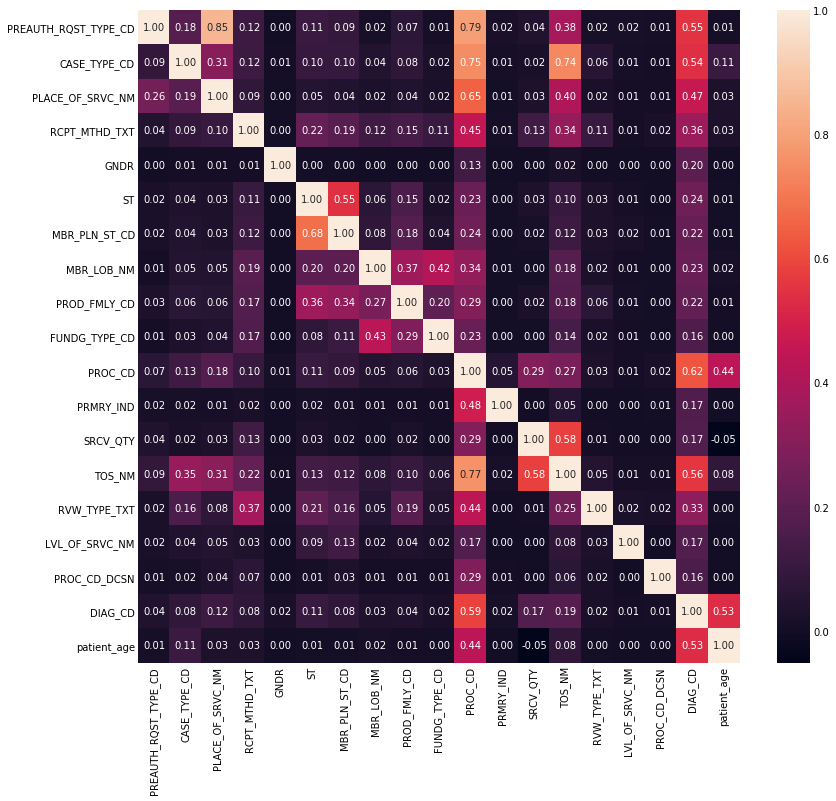

In [0]:
from nominal import associations
nomcol = [c for c in train.columns.values if c  not in ['SRCV_QTY','patient_age']]
associations(train, nominal_columns=nomcol, mark_columns=False, theil_u=True, figsize=(12,12))

## Data Encoding
#### Dealing with Categorical data
- For nominal columns try OneHot, Label, Hashing, LeaveOneOut, Target and Weight-of-evidence encoding. Avoid OneHot for high cardinality columns and use label instead for CART models.

#### Bayesian Encoders
The three Bayesian encoders use information from the dependent variable in their encodings. They all output one column and can work well with high cardinality data.
1. Target — use the mean of the DV, must take steps to avoid overfitting/ response leakage. Nominal, ordinal. For classification tasks.
2. LeaveOneOut — similar to target but avoids contamination. Nominal, ordinal. For classification tasks.


**Important Note:** Remember to do this encoding using ONLY the training data. For the validation / testing / scoring data use a lookup between the categorical label and the calculated value.

#### Weight of Evidence - Feature importance analysis
The advantages of WOE transformation are:
- Handles missing values
- Handles outliers
- The transformation is based on logarithmic value of distributions. This is aligned with the logistic regression output function
- No need for dummy variables
- By using proper binning technique, it can establish monotonic relationship (either increase or decrease) between the independent and dependent variable

Monotonic binning ensures linear relationship is established between independent and dependent variable. In the code, two functions **mono_bin()** and **char_bin()** are used for numeric variables and for character variables respectively. Spearman correlation is used to perform monotonic binning.

##### Rules related to WOE
- Each category (bin) should have at least 5% of the observations.
- Each category (bin) should be non-zero for both non-events and events.
- The WOE should be distinct for each category. Similar groups should be aggregated.
- The WOE should be monotonic, i.e. either growing or decreasing with the groupings.
- Missing values are binned separately.

#### To know more:  http://www.saedsayad.com/encoding.htm

In [0]:
'''Functions'''

def dummy_encode(data,dummy_encode):
    data = pd.concat([data,pd.get_dummies(data[dummy_encode])],axis=1).drop(dummy_encode,axis=1)
    return data

def label_encode(data, label_encode):
    data_temp = data.copy()
    for feat in label_encode:
        encoder = preprocessing.LabelEncoder()
        data_temp[feat] = encoder.fit_transform(data_temp[feat].values)
    return data_temp

def encode_train(data, encode, enc_list):
    #cardinal_encode.append('STTS_RSN_TXT')
    data = data.reset_index(drop=True)
    X3 = data.drop('PROC_CD_DCSN', axis=1)
    y3 = data['PROC_CD_DCSN']
    
    if encode=='leaveoneout':
        enc = ce.LeaveOneOutEncoder(cols=enc_list)
    elif encode=='target':
        enc = ce.TargetEncoder(cols=enc_list)
    elif encode=='woe':
        enc = WOEEncoder(cols=enc_list)
    elif encode=='hash':
        enc = ce.HashingEncoder(cols=enc_list)
    
    enc.fit(X3, y3)
    data = enc.transform(X3)
    data['PROC_CD_DCSN'] = y3
    return data,enc

def encode_test(data, enc):
    data = data.reset_index(drop=True)
    X3 = data.drop('PROC_CD_DCSN', axis=1)
    y3 = data['PROC_CD_DCSN']
    data = enc.transform(X3)
    data['PROC_CD_DCSN'] = y3
    return data

def encode_wrapper(train, test, encode, label=1):
    obj_list = train.select_dtypes('object').columns
    enc_list = ['MBR_PLN_ST_CD', 'TOS_NM', 'DIAG_CD', 'ST', 'PROC_CD']
    le_list = [x for x in list(obj_list) if x not in enc_list]

    if label==1:
        train,te = encode_train(train, encode, enc_list)
        test = encode_test(test, te)
        train = label_encode(train, le_list)
        test = label_encode(test, le_list)
    elif label==0:
        train,te = encode_train(train, encode, enc_list)
        test = encode_test(test, te)
        train = dummy_encode(train, le_list)
        test = dummy_encode(test, le_list)
        train,test = train.align(test, join='outer', axis=1, fill_value=0)
    else:
        train,te = encode_train(train, encode, obj_list.tolist())
        test = encode_test(test, te)
        
    print('Shape after '+encode+' encoding')
    print(train.shape, test.shape)
    return train,test

In [0]:
'''Encoder pickling for server'''
# obj_list = train.select_dtypes('object').columns.tolist()
# data = train.copy()
# data = data.reset_index(drop=True)
# X3 = data.drop('PROC_CD_DCSN', axis=1)
# y3 = data['PROC_CD_DCSN']
# enc = ce.TargetEncoder(cols=obj_list)
# enc.fit(X3, y3)

# from sklearn.externals import joblib
# joblib.dump(enc, 'enc.joblib') 

'Encoder pickling for server'

In [0]:
# #### One-hot encoding of all categorical variables
# obj_list = train.select_dtypes('object').columns
# train_dummy = train.copy()
# test_dummy = test.copy()
# train_dummy = dummy_encode(train_dummy, obj_list)
# test_dummy = dummy_encode(test_dummy, obj_list)
# print('Shape after dummy encoding')
# print(train_dummy.shape, test_dummy.shape)
# gc.collect()

# #### Label encoding of all categorical variables (suitable only for CART models)
# obj_list = train.select_dtypes('object').columns
# train_le = train.copy()
# test_le = test.copy()
# train_le = label_encode(train_le, obj_list)
# test_le = label_encode(test_le, obj_list)
# print('Shape after label encoding')
# print(train_le.shape, test_le.shape)
# gc.collect()

In [0]:
# %%time
# #### HTLW of high-cardinal variables and label encoding of other categorical variables (for CART only)
# train_hash_le,test_hash_le = encode_wrapper(train, test, 'hash', label=1)
# train_target_le,test_target_le = encode_wrapper(train, test, 'target', label=1)
# train_leaveoneout_le,test_leaveoneout_le = encode_wrapper(train, test, 'leaveoneout', label=1)
# train_woe_le,test_woe_le = encode_wrapper(train, test, 'woe', label=1)
# gc.collect()

In [0]:
%%time
#### HTLW of high-cardinal variables and dummy encoding of other categorical variables
#train_hash_ohe,test_hash_ohe = encode_wrapper(train, test, 'hash', label=0)
#train_target_ohe,test_target_ohe = encode_wrapper(train, test, 'target', label=0)
#train_leaveoneout_ohe,test_leaveoneout_ohe = encode_wrapper(train, test, 'leaveoneout', label=0)
#train_woe_ohe,test_woe_ohe = encode_wrapper(train, test, 'woe', label=0)
#gc.collect()

Wall time: 0 ns


In [0]:
%%time
#### HTLW of all categorical variables
#train_hash_all,test_hash_all = encode_wrapper(train, test, 'hash', label=-1)
train_target_all,test_target_all = encode_wrapper(train, test, 'target', label=-1)
#train_leaveoneout_all,test_leaveoneout_all = encode_wrapper(train, test, 'leaveoneout', label=-1)
#train_woe_all,test_woe_all = encode_wrapper(train, test, 'woe', label=-1)
gc.collect()

Shape after target encoding
(2469, 19) (660, 19)
Wall time: 1min 15s


In [0]:
data = train_target_all

### PCA 2-D visualization of data

In [0]:
data.columns

Index(['PREAUTH_RQST_TYPE_CD', 'CASE_TYPE_CD', 'PLACE_OF_SRVC_NM',
       'RCPT_MTHD_TXT', 'GNDR', 'ST', 'MBR_PLN_ST_CD', 'MBR_LOB_NM',
       'PROD_FMLY_CD', 'FUNDG_TYPE_CD', 'PROC_CD', 'PRMRY_IND', 'SRCV_QTY',
       'TOS_NM', 'RVW_TYPE_TXT', 'LVL_OF_SRVC_NM', 'DIAG_CD', 'patient_age',
       'PROC_CD_DCSN'],
      dtype='object')

In [0]:
data['CASE_TYPE_CD'].nunique()

10

In [0]:
var = 'CASE_TYPE_CD'

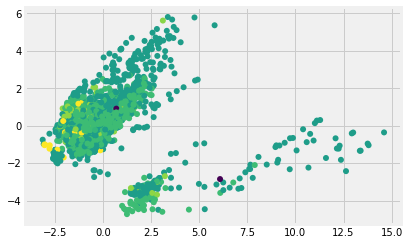

In [0]:
from sklearn.decomposition import PCA

X = data.drop(var, axis=1).values
# Convert the diagnosis column to numeric format
y1 = data[var]#.factorize()[0]

# Rescale data before PCA
X_scale = preprocessing.StandardScaler().fit_transform(X)

# Invoke the PCA method. Since this is a binary classification problem, let's call n_components = 2
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X_scale)

x = pca_2d[:,0]
y = pca_2d[:,1]
plt.scatter(x,y, c=y1, edgecolor="None", alpha=1)
plt.show()

### TSNE and PCA 2-D visualization of data

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2508 samples in 0.001s...
[t-SNE] Computed neighbors for 2508 samples in 0.339s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2508
[t-SNE] Computed conditional probabilities for sample 2000 / 2508
[t-SNE] Computed conditional probabilities for sample 2508 / 2508
[t-SNE] Mean sigma: 0.978086
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.608116
[t-SNE] KL divergence after 1000 iterations: 0.731823


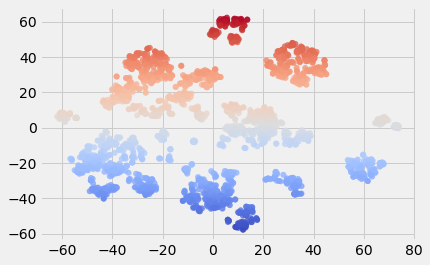

In [0]:
from sklearn.manifold import TSNE

X = data.drop(var, axis=1).values
# Convert the diagnosis column to numeric format
y1 = data[var].factorize()[0]

# Rescale data before TSNE
X_scale = preprocessing.StandardScaler().fit_transform(X)

# Sklearn TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0, learning_rate=100, verbose=1)
X_t = tsne.fit_transform(X_scale)

x = X_t[:,0]
y = X_t[:,1]
plt.scatter(x,y, c=y1, cmap="coolwarm", edgecolor="None", alpha=0.8)
plt.show()

### Principal Component Analysis (PCA) convergence

Text(0, 0.5, 'Cumulative explained variance')

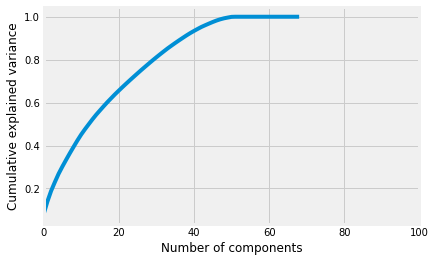

In [0]:
X = train_target_ohe.drop('PROC_CD_DCSN', axis=1)
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,100,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

## Machine Learning

In [0]:
def display_confusion_matrix(sample_test, prediction, score=None, report=None):
    cm = metrics.confusion_matrix(sample_test, prediction)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.plot()
    if score:
        all_sample_title = 'Accuracy Score: {0}'.format(score)
        plt.title(all_sample_title, size = 15)
    if report:
        print(metrics.classification_report(sample_test, prediction))    

def cmatrix(model, threshold):
    predicted_proba = model.predict_proba(x_test)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')
    display_confusion_matrix(y_test, predicted)      

#ROC Curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its 
#discrimination threshold is varied
def plot_roc(model, x_test, y_test):
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    [fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)
    print(model.__class__.__name__+" accuracy is %2.3f" % metrics.accuracy_score(y_test, model.predict(x_test)))
    print(model.__class__.__name__+" log_loss is %2.3f" % metrics.log_loss(y_test, y_pred_proba))
    print(model.__class__.__name__+" auc is %2.3f" % metrics.auc(fpr, tpr))

    idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

    plt.figure()
    plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % metrics.auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
    plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
    plt.ylabel('True Positive Rate (recall)', fontsize=14)
    plt.title('Receiver operating characteristic (ROC) curve')
    plt.legend(loc="lower right")
    plt.show()
    
def plot_pr(model, x_train, y_train):
    y_proba_train = model.predict_proba(x_train)[:, 1]
    p, r, t = metrics.precision_recall_curve(y_train, y_proba_train)
    plt.figure()
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(t, p[:-1], "b--", label="Precision")
    plt.plot(t, r[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.show()
    
def print_scores(model, x_test, y_test):
    print("Accuracy:", metrics.accuracy_score(y_test, model.predict(x_test)))
    print("Precision:", metrics.precision_score(y_test, model.predict(x_test)))
    print("Recall:",metrics.recall_score(y_test, model.predict(x_test)))
    print("F1-score:",metrics.f1_score(y_test, model.predict(x_test)))
    
def score_table(model):
    results = pd.DataFrame(model.cv_results_)
    results = results.sort_values(by='mean_test_precision_score', ascending=False)
    results_df = results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 
                          'param_max_depth', 'param_max_features', 'param_min_samples_split', 
                          'param_n_estimators']].round(3)
    return results_df


scorers = {'precision_score': metrics.make_scorer(metrics.precision_score),
           'recall_score': metrics.make_scorer(metrics.recall_score),
           'accuracy_score': metrics.make_scorer(metrics.accuracy_score)}


# http://www.r2d3.us/visual-intro-to-machine-learning-part-1/
# http://www.r2d3.us/visual-intro-to-machine-learning-part-2/

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    plt.plot()
    
def train_test_split_me(train, test):
    target = 'PROC_CD_DCSN'
    x_train = train.drop([target], axis=1)
    y_train = train[target]
    x_test = test.drop([target], axis=1)
    y_test = test[target]
    return x_train, x_test, y_train, y_test

def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    
def display_proba(model, full=0, fulllabel=0):
    x = pd.DataFrame(model.predict_proba(x_test), columns=['Rejection confidence', 'Approval confidence'])
    cols = x.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    x = x[cols]
    x['Predicted Decision'] = pd.Series(model.predict(x_test)).map({1:'Approve', 0:'Reject'})
    if full==1:
        x = x_test.reset_index(drop=True).merge(x.reset_index(drop=True), left_index=True, right_index=True)
        x['Actual Decision'] = pd.Series(y_test).reset_index(drop=True).map({1:'Approve', 0:'Reject'})
    elif fulllabel==1:
        x = test.reset_index(drop=True).drop('PROC_CD_DCSN', axis=1).merge(x.reset_index(drop=True), left_index=True, right_index=True)
        x['Actual Decision'] = pd.Series(y_test).reset_index(drop=True).map({1:'Approve', 0:'Reject'})
    return x

def model_wrapper(model, train, test, traintest=1, scores=1, cv=0, cmatrix=1, roc=0, pr=0, lc=0, fi=1, phead=0):
    x_train, x_test, y_train, y_test = train_test_split_me(train, test)
    kfold = StratifiedKFold(n_splits=10)
    model.fit(x_train, y_train)
    if traintest==1:
        print('Training score:',model.score(x_train,y_train))
        print('Test score:',model.score(x_test, y_test))
    if cv==1:
        print('Cross-validation score:',np.mean(cross_val_score(model, x_train, y_train, cv=kfold)))
    if scores==1:
        print_scores(model, x_test, y_test)
    if cmatrix==1:
        display_confusion_matrix(y_test, model.predict(x_test))
    if roc==1:
        plot_roc(model, x_test, y_test)
    if pr==1:
        plot_pr(model, x_train, y_train)
    if fi==1:
        pd.Series(model.feature_importances_, index=x_train.columns).nlargest(10).plot(kind='barh')  
    if lc==1:
        plot_learning_curve(model,"Classifier learning curves",x_train,y_train,cv=kfold) 
    if phead==1:
        display_proba(model).head()

In [0]:
# Logistic Regression
lr = LogisticRegression()
model_wrapper(lr, train_target_ohe, test_target_ohe, traintest=1, scores=1, cv=1, cmatrix=0, roc=0, pr=0, lc=0, fi=0, phead=0)
print('-'*10)

# Decision Tree
dt = DecisionTreeClassifier()
model_wrapper(dt, train_target_ohe, test_target_ohe, traintest=1, scores=1, cv=1, cmatrix=0, roc=0, pr=0, lc=0, fi=0, phead=0)
print('-'*10)

# Random forest
rf = RandomForestClassifier(n_estimators=20)
model_wrapper(rf, train_target_ohe, test_target_ohe, traintest=1, scores=1, cv=0, cmatrix=0, roc=0, pr=0, lc=0, fi=0, phead=0)
print('-'*10)

#XG Boost
xgb = XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)
model_wrapper(xgb, train_target_ohe, test_target_ohe, traintest=1, scores=1, cv=0, cmatrix=0, roc=0, pr=0, lc=0, fi=0, phead=0)
print('-'*10)

Training score: 0.8887096774193548
Test score: 0.8644859813084113
Cross-validation score: 0.8854661036728866
Accuracy: 0.8644859813084113
Precision: 0.877104377104377
Recall: 0.9738317757009346
F1-score: 0.9229406554472984
----------
Training score: 1.0
Test score: 0.7694704049844237
Cross-validation score: 0.8435382839966369
Accuracy: 0.7694704049844237
Precision: 0.8685714285714285
Recall: 0.8523364485981308
F1-score: 0.860377358490566
----------
Training score: 0.9983870967741936
Test score: 0.8489096573208723
Accuracy: 0.8489096573208723
Precision: 0.8815331010452961
Recall: 0.9457943925233645
F1-score: 0.9125338142470695
----------
Training score: 0.9766129032258064
Test score: 0.8286604361370716
Accuracy: 0.8286604361370716
Precision: 0.8708551483420593
Recall: 0.9327102803738317
F1-score: 0.9007220216606499
----------


![title](img/biasvariance.png)

- If a model is balanced, both errors converge to small values as the training sample size increases.
- If a model has high bias, it ends up underfitting the data. As a result, both errors fail to decrease no matter how many examples there are in the training set.
- If a model has high variance, it ends up overfitting the training data. In that case, increasing the training sample size decreases the training error but it fails to decrease the validation error.

In [0]:
x_train, x_test, y_train, y_test = train_test_split_me(train_target_all, test_target_all)

In [0]:
##C:\Users\AG17578\AppData\Local\conda\conda\envs\env1\Library\bin\graphviz
#os.environ["PATH"] += os.pathsep + 'C:/Users/AG17578/AppData/Local/conda/conda/envs/env1/Library/bin/graphviz'

#import pydotplus
#tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=x_test.columns.tolist(),
#                                  max_depth = 10, impurity = False, class_names = ['Reject', 'Approved'],
#                                  rounded = True, filled= True, proportion = False, precision = 2)

#graph = pydotplus.graph_from_dot_data(tree_graph)
#graph.write_png('treex.png')

#display(graphviz.Source(tree_graph))

In [0]:
# Random forest
rf = RandomForestClassifier(n_estimators=20)
model_wrapper(rf, train_target_all, test_target_all, traintest=1, scores=1, cmatrix=0, fi=0)

Training score: 0.9991935483870967
Test score: 0.8442367601246106
Accuracy: 0.8442367601246106
Precision: 0.8756476683937824
Recall: 0.9476635514018692
F1-score: 0.910233393177738


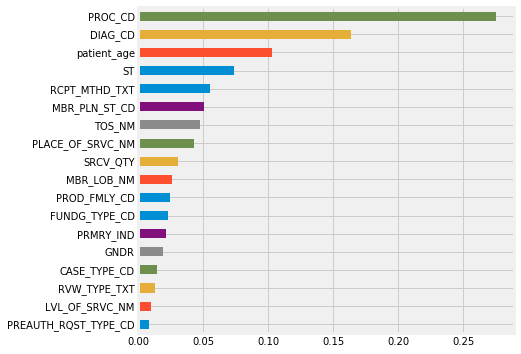

In [0]:
plt.figure(figsize=(6,6))
pd.Series(rf.feature_importances_, index=x_train.columns).sort_values().plot(kind='barh')
#plt.savefig('fi.png', bbox_inches='tight')

In [0]:
%%time
RFC = RandomForestClassifier()
kfold = StratifiedKFold(n_splits=10)
x_train, x_test, y_train, y_test = train_test_split_me(train_target_all, test_target_all)

rf_param_grid = {"max_depth": [3, 5, 10],
                  "max_features": [3, 5, 10],
                  "min_samples_split": [2, 3, 10],
                  "bootstrap": [True],
                  "n_estimators" :[50, 100, 300, 500],
                  "oob_score" :[True]}

refit_score='accuracy_score'

rsRFC = GridSearchCV(RFC, rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose=1)
rsRFC.fit(x_train,y_train)
print_scores(rsRFC, x_test, y_test)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  7.6min finished


Accuracy: 0.8629283489096573
Precision: 0.8718801996672213
Recall: 0.9794392523364486
F1-score: 0.9225352112676057
Wall time: 7min 33s


In [0]:
# # '''model pickling for server'''
# x_train, x_test, y_train, y_test = train_test_split_me(train_target_all, test_target_all)
# rf = RandomForestClassifier(n_estimators=20)
# rf.fit(x_train, y_train)

# from sklearn.externals import joblib
# joblib.dump(rf, 'rf.joblib')

# # df.iloc[0:1].to_json(orient='records')

In [0]:
def ml_predict(df):
    loaded_model = joblib.load('rf.joblib')
    predictions = loaded_model.predict(df)
    print(predictions)
    if predictions==0:
        prediction_prob = loaded_model.predict_proba(df)[:,1]
    elif predictions==1:
        prediction_prob = loaded_model.predict_proba(df)[:,0]
    mydict = {0: 'DENIED', 1: 'APPROVED'}
    predictions_mapped = [mydict.get(n, n) for n in predictions]
    return predictions_mapped,prediction_prob

Training score: 0.9979838709677419
Test score: 0.839563862928349
Cross-validation score: 0.8769999024437833
Accuracy: 0.839563862928349
Precision: 0.8686006825938567
Recall: 0.9514018691588785
F1-score: 0.9081177520071364
RandomForestClassifier accuracy is 0.840
RandomForestClassifier log_loss is 0.880
RandomForestClassifier auc is 0.731


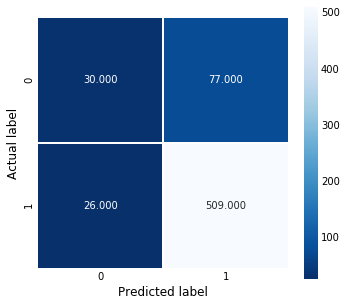

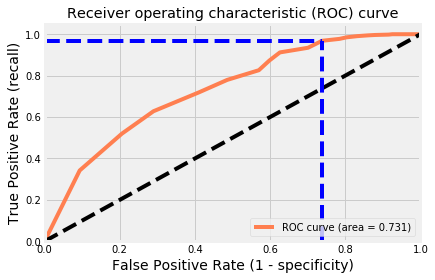

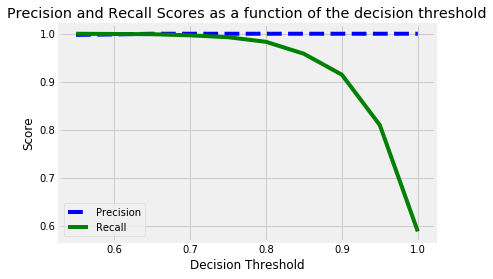

ValueError: Number of features of the model must match the input. Model n_features is 69 and input n_features is 18 

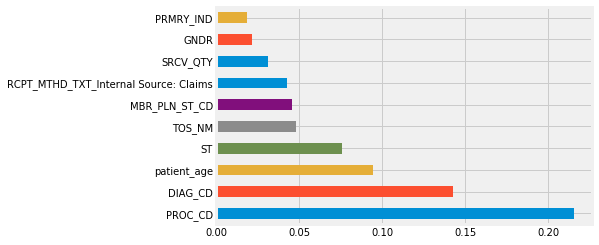

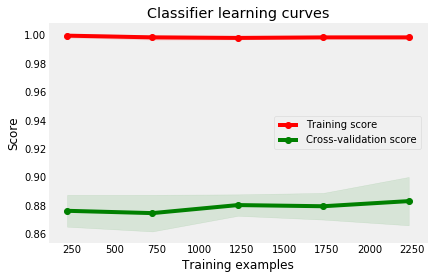

In [0]:
# Random forest
rf = RandomForestClassifier(n_estimators=20)
model_wrapper(rf, train_target_ohe, test_target_ohe, traintest=1, scores=1, cv=1, cmatrix=1, roc=1, pr=1, lc=1, fi=1, phead=1)

## Feature Selection and Retraining
- SelectFromModel
- SelectKBest with Chi2 metric
- Recursive Feature Elimination with cross-validation
- Information Value (weight of evidence derived)
- eli5 Permutation Importance

In [0]:
x_train, x_test, y_train, y_test = train_test_split_me(train_target_all, test_target_all)

In [0]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(x_train, y_train)

sfm = SelectFromModel(rf, threshold=0.05)
sfm.fit(x_train, y_train)

sfm_support = sfm.get_support()
sfm_feature = x_train.loc[:,sfm_support].columns.tolist()
print(str(len(sfm_feature)), 'selected features')
sfm_feature

6 selected features


['RCPT_MTHD_TXT', 'ST', 'MBR_PLN_ST_CD', 'PROC_CD', 'DIAG_CD', 'patient_age']

In [0]:
chi_selector = SelectKBest(chi2, k=10)
chi_selector.fit(x_train, y_train)

chi_support = chi_selector.get_support()
chi_feature = x_train.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
chi_feature

10 selected features


['RCPT_MTHD_TXT',
 'GNDR',
 'MBR_PLN_ST_CD',
 'MBR_LOB_NM',
 'PROC_CD',
 'PRMRY_IND',
 'SRCV_QTY',
 'TOS_NM',
 'DIAG_CD',
 'patient_age']

In [0]:
rfe = RFE(rf, 10)
rfe = rfe.fit(x_train, y_train)
rfe_support = rfe.get_support()
rfe_feature = x_train.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
rfe_feature

10 selected features


['PLACE_OF_SRVC_NM',
 'RCPT_MTHD_TXT',
 'ST',
 'MBR_PLN_ST_CD',
 'PROD_FMLY_CD',
 'PROC_CD',
 'SRCV_QTY',
 'TOS_NM',
 'DIAG_CD',
 'patient_age']

In [0]:
## IV of features
def iv_woe(X, Y, ivonly=0):
    df1 = pd.DataFrame({"X": X, "Y": Y})
    df2 = df1.groupby('X',as_index=True)

    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    if ivonly==1:
        return (d3['IV'][0])
    else:
        return d3

In [0]:
iv_values = []
for col in x_train.columns:
    iv_values.append(iv_woe(x_train[col], y_train, ivonly = 1))

In [0]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf, random_state=1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist(),top=20)

Weight,Feature
0.0155 ± 0.0175,PROC_CD
0.0066 ± 0.0076,PLACE_OF_SRVC_NM
0.0066 ± 0.0117,DIAG_CD
0.0044 ± 0.0042,RCPT_MTHD_TXT
0.0038 ± 0.0088,TOS_NM
0.0032 ± 0.0108,MBR_PLN_ST_CD
0.0025 ± 0.0059,PRMRY_IND
0.0019 ± 0.0037,MBR_LOB_NM
0.0013 ± 0.0042,RVW_TYPE_TXT
0.0006 ± 0.0047,GNDR


In [0]:
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':x_train.columns,'RFE':rfe_support,'SFM':sfm_support,'Chi2':chi_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
#adding IV
feature_selection_df['IV'] = iv_values
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df

,Feature,RFE,SFM,Chi2,Total,IV
1,patient_age,True,True,True,3,0.175299
2,RCPT_MTHD_TXT,True,True,True,3,0.937041
3,PROC_CD,True,True,True,3,0.654629
4,MBR_PLN_ST_CD,True,True,True,3,0.135474
5,DIAG_CD,True,True,True,3,0.684631
6,TOS_NM,True,False,True,2,0.385589
7,ST,True,True,False,2,0.192564
8,SRCV_QTY,True,False,True,2,0.157506
9,PROD_FMLY_CD,True,False,False,1,0.148884
10,PRMRY_IND,False,False,True,1,0.073808


## Classifier Model's Comparison

Wall time: 20.3 s


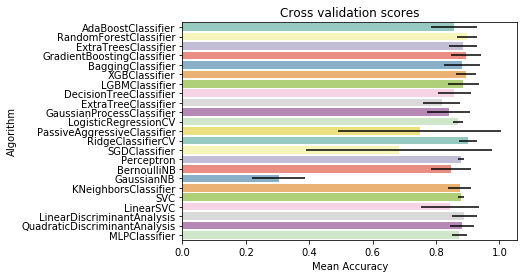

In [0]:
%%time
random_state = 2
kfold = StratifiedKFold(n_splits=10)
njobs = 2

classifiers = []

#Ensemble Methods
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(BaggingClassifier(random_state=random_state))
classifiers.append(XGBClassifier(random_state=random_state))
classifiers.append(LGBMClassifier(random_state=random_state))
   
#Trees    
classifiers.append(DecisionTreeClassifier())
classifiers.append(ExtraTreeClassifier())
    
#Gaussian Processes
classifiers.append(GaussianProcessClassifier())
    
#GLM
classifiers.append(LogisticRegressionCV())
classifiers.append(PassiveAggressiveClassifier())
classifiers.append(RidgeClassifierCV())
classifiers.append(SGDClassifier())
classifiers.append(Perceptron())
    
#Navies Bayes
classifiers.append(BernoulliNB())
classifiers.append(GaussianNB())
    
#Nearest Neighbor
classifiers.append(KNeighborsClassifier())
    
#SVM
classifiers.append(SVC())
classifiers.append(LinearSVC())
    
#Discriminant Analysis
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(QuadraticDiscriminantAnalysis())

#MLP
classifiers.append(MLPClassifier())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, x_train, y_train, scoring = "accuracy", cv = kfold, n_jobs = njobs))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":['AdaBoostClassifier',
                                                                                    'RandomForestClassifier',
                                                                                    'ExtraTreesClassifier',
                                                                                    'GradientBoostingClassifier',
                                                                                    'BaggingClassifier',
                                                                                    'XGBClassifier',
                                                                                    'LGBMClassifier',
                                                                                    'DecisionTreeClassifier',
                                                                                    'ExtraTreeClassifier',
                                                                                    'GaussianProcessClassifier',
                                                                                    'LogisticRegressionCV',
                                                                                    'PassiveAggressiveClassifier',
                                                                                    'RidgeClassifierCV',
                                                                                    'SGDClassifier',
                                                                                    'Perceptron',
                                                                                    'BernoulliNB',
                                                                                    'GaussianNB',
                                                                                    'KNeighborsClassifier',
                                                                                    'SVC',
                                                                                    'LinearSVC',
                                                                                    'LinearDiscriminantAnalysis',
                                                                                    'QuadraticDiscriminantAnalysis',
                                                                                    'MLPClassifier']})

plt.figure(figsize=(8,8))
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [0]:
#compare algorithm predictions with each other, where 1 = exactly similar and 0 = exactly opposite
#there are some 1's, but enough blues and light reds to create a "super algorithm" by combining them
correlation_heatmap(cv_results)

## Hyperparameter Optimization and Voting Ensembling
* **max_features**: This is the random subset of features to be considered for splitting operation, the lower the better to reduce variance. For Classification model, ideal max_features = sqr(n_var).
* **max_depth**: Maximum depth of the tree. Alternate method of control model depth is max_leaf_nodes, which limits the number of terminal nodes, effectively limiting the depth of the tree.
* **n_estimators**: Number of trees built before average prediction is made.
* **min_samples_split**: Minimum number of samples required for a node to be split. Small minimum would potentially lead to a “Bushy Tree”, prone to overfitting. According to Analytic Vidhya, should be around 0.5~1% of the datasize.
* **min_samples_leaf**: Minimum number of samples required at the Terminal Node of the tree. In Sklearn, an alternative min_weight_fraction_leaf is available to use fraction of the data instead of a fixed integer.
* **random_state**: Ensuring consistent random generation, like seed(). Important to consider for comparing models of the same type to ensure a fair comparison. May cause overfitting if random generation is not representative.

In [0]:
%%time
RFC = RandomForestClassifier()
kfold = StratifiedKFold(n_splits=10)

rf_param_grid = {"max_depth": [None, 3, 5, 10],
              "max_features": [1, 3, 5, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "n_estimators" :[20, 50, 100, 300]}

refit_score='accuracy_score'

rsRFC = RandomizedSearchCV(RFC, rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose=3, n_iter=40)
rsRFC.fit(x_train,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 tasks      | elapsed:    7.8s


Wall time: 21.3 s


[Parallel(n_jobs=-1)]: Done 397 out of 400 | elapsed:   21.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   21.2s finished
C:\Users\AG17578\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
print ('Best Accuracy score on Training data:', rsRFC.best_score_)
print ('Best Accuracy score on Test data:', rsRFC.best_estimator_.score(x_test,y_test))

Best Accuracy score on Training data: 0.9015748031496063
Best Accuracy score on Test data: 0.890625


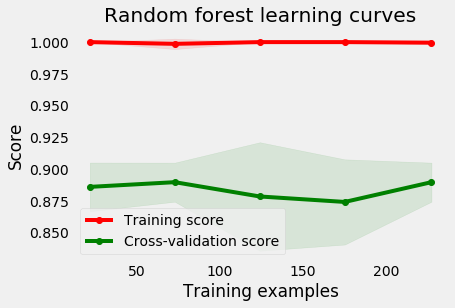

In [0]:
plot_learning_curve(rsRFC.best_estimator_,"Random forest learning curves",x_train,y_train,cv=kfold)

In [0]:
%%time
LGBM = LGBMClassifier()
kfold = StratifiedKFold(n_splits=10)

lgbm_params = {'num_leaves': [27, 31, 61, 81, 127, 197, 231, 275, 302],
              'bagging_fraction': [0.5, 0.7, 0.8, 0.9],
              'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5],
              #'min_data': [300, 400, 450, 500, 550, 650],
              'is_unbalance': [True, False],
              'max_bin': [3, 5, 10, 12, 18, 20, 22],
              'boosting_type' : ['gbdt', 'dart'],
              'bagging_freq': [3, 9, 11, 15, 17, 23, 31],
              'max_depth': [3, 4, 5, 6, 7, 9, 11],       
              'feature_fraction': [0.5, 0.7, 0.8, 0.9],
              'lambda_l1': [0, 10, 20, 30, 40],
              #'objective': 'binary', 
              'metric': 'auc'}
            
rsLGBM = RandomizedSearchCV(LGBM, lgbm_params, cv=kfold, scoring="accuracy", n_jobs= -1, verbose=1, n_iter=40)

rsLGBM.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:    5.1s


Wall time: 12.5 s


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   12.3s finished
C:\Users\AG17578\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
%%time
ABclf = AdaBoostClassifier()
kfold = StratifiedKFold(n_splits=5)

ab_params = {'learning_rate':[0.25,0.5,0.75,1.],
               'n_estimators':[100,250,500,650]
            }
            
rsADABoost = RandomizedSearchCV(ABclf, ab_params, cv=kfold, scoring="accuracy", n_jobs= -1, verbose=1, n_iter=40)

rsADABoost.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   21.1s finished
C:\Users\AG17578\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Wall time: 21.7 s


In [0]:
print_scores(rsRFC, x_test, y_test)
print('-'*10)
print_scores(rsLGBM, x_test, y_test)
print('-'*10)
print_scores(rsADABoost, x_test, y_test)
print('-'*10)

Accuracy: 0.890625
Precision: 0.9
Recall: 0.9818181818181818
F1-score: 0.9391304347826087
----------
Accuracy: 0.8125
Precision: 0.8909090909090909
Recall: 0.8909090909090909
F1-score: 0.8909090909090909
----------
Accuracy: 0.875
Precision: 0.8983050847457628
Recall: 0.9636363636363636
F1-score: 0.9298245614035089
----------


#### Check the similarity in prediction of these classifiers

In [0]:
prediction_AdaBoosting = pd.Series(gsadaDTC.best_estimator_.predict(x_test), name="AdaBoosting")
prediction_ExtraTrees = pd.Series(gsExtC.best_estimator_.predict(x_test), name="ExtraTrees")
prediction_RandomForest = pd.Series(gsRFC.best_estimator_.predict(x_test), name="RandomForest")
prediction_GradientBoosting = pd.Series(gsGBC.best_estimator_.predict(x_test), name="GradientBoosting")
prediction_Logistic_Regression = pd.Series(gsLogReg.best_estimator_.predict(x_test), name="Logistic Regression")
prediction_LDA = pd.Series(gsLDAC.best_estimator_.predict(x_test), name="LDA")

# Concatenate all classifier results
ensemble_results = pd.concat([prediction_AdaBoosting, prediction_ExtraTrees, prediction_RandomForest,
                              prediction_GradientBoosting, prediction_Logistic_Regression, prediction_LDA],axis=1)

g= sns.heatmap(ensemble_results.corr(),annot=True)

In [0]:
#why choose one model, when you can pick them all with voting classifier
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
#removed models w/o attribute 'predict_proba' required for vote classifier and models with a 1.0 correlation to another model
kfold = StratifiedKFold(n_splits=2)
vote_est = [
    ('rf', rsRFC),
    ('lgb',rsLGBM),
    ('ada',rsADABoost)
]

#Hard Vote or majority rules w/Tuned Hyperparameters
vote_hard = VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = cross_validate(vote_hard, x_train, y_train, cv=kfold)

print("Hard Voting Training w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100)) 
print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Hard Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))
print('-'*10)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 374 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   56.1s finished
C:\Users\AG17578\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    9.1s finished
C:\Users\AG17578\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   18.0s finished
C:\Users\AG17578\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   22.6s finished
C:\Users\AG17578\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    9.7s finished
C:\Users\AG17578\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   18.8s finished
C:\Users\AG17578\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Hard Voting Training w/bin score mean: 99.22
Hard Voting Test w/bin score mean: 88.59
Hard Voting Test w/bin score 3*std: +/- 0.91
----------


In [0]:
#Soft Vote or weighted probabilities
#Hard Vote or majority rules w/Tuned Hyperparameters
vote_soft = VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = cross_validate(vote_soft, x_train, y_train, cv=kfold)

print("Soft Voting Training w/bin score mean: {:.2f}". format(vote_soft_cv['train_score'].mean()*100)) 
print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('-'*10)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 397 out of 400 | elapsed:   39.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   39.4s finished
C:\Users\AG17578\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   11.1s finished
C:\Users\AG17578\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   19.1s finished
C:\Users\AG17578\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   26.8s finished
C:\Users\AG17578\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    8.8s finished
C:\Users\AG17578\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   41.1s finished
C:\Users\AG17578\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Soft Voting Training w/bin score mean: 90.95
Soft Voting Test w/bin score mean: 88.19
Soft Voting Test w/bin score 3*std: +/- 0.28
----------


### PyGAM Classifier
#### Logistic Generalized Additive Model [GAM]
* https://multithreaded.stitchfix.com/blog/2015/07/30/gam/
* https://codeburst.io/pygam-getting-started-with-generalized-additive-models-in-python-457df5b4705f
* https://github.com/dswah/pyGAM

In [0]:
# %%time
# GAMclf = LogisticGAM()
# GAMclf.fit(x_train, y_train)
# print_scores(GAMclf, x_test, y_test)

### Autosklearn - for unix only

In [0]:
# import autosklearn.classification
# import sklearn.model_selection
# import sklearn.datasets

# automl = autosklearn.classification.AutoSklearnClassifier()
# automl.fit(x_train, y_train)
# print_scores(automl)

### CATBoost

In [0]:
# data_cb = processed_data.copy()

# data_cb['diagnosis_code'] = data_cb['diagnosis_code'].fillna('')
# data_cb['procedure_code'] = data_cb['procedure_code'].fillna('')
# data_cb['patientDemographics.groupId'] = data_cb['patientDemographics.groupId'].fillna('')
# data_cb['placeOfService'] = data_cb['placeOfService'].fillna(0)

# data_cb['caseIndicators.derivedOon'] = data_cb['caseIndicators.derivedOon'].astype(object)
# data_cb['placeOfService'] = data_cb['placeOfService'].astype(object)

# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# data_cb = data_cb.apply(le.fit_transform)

# cat_features = list(set(range(26))-set([18,25]))
# x_train_cb, y_train_cb, x_test_cb, y_test_cb = split_me(data_cb, 'decision')
# CBoostClf = catboost.CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42)
# CBoostClf.fit(x_train_cb,y_train_cb, cat_features=cat_features, eval_set=(x_test_cb,y_test_cb))

# print('Test accuracy is :{:.6f}'.format(metrics.accuracy_score(y_test_cb, CBoostClf.predict(x_test_cb))))

## Pipelines

In [0]:
train1 = train1.reset_index(drop=True)
test1 = test1.reset_index(drop=True)

In [0]:
obj_list = train1.select_dtypes('object').columns.tolist()
enc_list = ['MBR_PLN_ST_CD', 'TOS_NM', 'DIAG_CD', 'ST', 'PROC_CD']
le_list = [x for x in list(obj_list) if x not in enc_list]
x_train, x_test, y_train, y_test = train_test_split_me(train1,test1)

### single pipeline

In [0]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('te',ce.TargetEncoder(cols=obj_list)),('rf', RandomForestClassifier())])
pipeline.fit(x_train, y_train)
print_scores(pipeline, x_test, y_test)

Accuracy: 0.8571428571428571
Precision: 0.8656716417910447
Recall: 0.9830508474576272
F1-score: 0.9206349206349207


### multiple pipelines
- encoding
    - all target
    - all hash
    - all leaveoneout
    - all label
    - target + label
- classifier
    - logistic
    - random forest
    - xgboost
    - svc

In [0]:
%%time

pipe_te_lr = Pipeline([('te',ce.TargetEncoder(cols=obj_list)),('lr', LogisticRegression())])
pipe_he_lr = Pipeline([('he',ce.HashingEncoder(cols=obj_list)),('lr', LogisticRegression())])
pipe_loe_lr = Pipeline([('loe',ce.LeaveOneOutEncoder(cols=obj_list)),('lr', LogisticRegression())])

pipe_te_rf = Pipeline([('te',ce.TargetEncoder(cols=obj_list)),('rf', RandomForestClassifier())])
pipe_he_rf = Pipeline([('he',ce.HashingEncoder(cols=obj_list)),('rf', RandomForestClassifier())])
pipe_loe_rf = Pipeline([('loe',ce.LeaveOneOutEncoder(cols=obj_list)),('rf', RandomForestClassifier())])
#pipe_le_rf = Pipeline([('le',LabelEncoder(cols=obj_list)),('rf', RandomForestClassifier())])
#pipe_tele_rf = Pipeline([('tele',ce.TargetEncoder(cols=enc_list)),('le',LabelEncoder(cols=le_list)),('rf', RandomForestClassifier())])

pipe_te_xgb = Pipeline([('te',ce.TargetEncoder(cols=obj_list)),('xgb', XGBClassifier())])
pipe_he_xgb = Pipeline([('he',ce.HashingEncoder(cols=obj_list)),('xgb', XGBClassifier())])
pipe_loe_xgb = Pipeline([('loe',ce.LeaveOneOutEncoder(cols=obj_list)),('xgb', XGBClassifier())])
#pipe_le_xgb = Pipeline([('le',LabelEncoder(cols=obj_list)),('xgb', XGBClassifier())])
#pipe_tele_xgb = Pipeline([('tele',ce.TargetEncoder(cols=enc_list)),('le',LabelEncoder(cols=le_list)),('xgb', XGBClassifier())])

pipe_te_lsvc = Pipeline([('te',ce.TargetEncoder(cols=obj_list)),('lsvc', LinearSVC())])
pipe_he_lsvc = Pipeline([('he',ce.HashingEncoder(cols=obj_list)),('lsvc', LinearSVC())])
pipe_loe_lsvc = Pipeline([('loe',ce.LeaveOneOutEncoder(cols=obj_list)),('lsvc', LinearSVC())])

pipe_dic = {0: 'lr target', 1: 'lr hash', 2:'lr leaveoneout',
            3: 'Rf target', 4: 'Rf hash', 5: 'Rf leaveoneout',
            6: 'xgb target', 7: 'xgb hash', 8: 'xgb leaveoneout',
            9: 'lsvc target',10: 'lsv hash', 11:'lsvc leaveoneout'}
pipelines = [pipe_te_lr, pipe_he_lr, pipe_loe_lr, 
             pipe_te_rf, pipe_he_rf, pipe_loe_rf, 
             pipe_te_xgb, pipe_he_xgb, pipe_loe_xgb,
             pipe_te_lsvc, pipe_he_lsvc, pipe_loe_lsvc]

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(x_train, y_train)
# Compare accuracies
for idx, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.3f' % (pipe_dic[idx], val.score(x_test, y_test)))

lr target pipeline test accuracy: 0.843
lr hash pipeline test accuracy: 0.843
lr leaveoneout pipeline test accuracy: 0.843
Rf target pipeline test accuracy: 0.871
Rf hash pipeline test accuracy: 0.843
Rf leaveoneout pipeline test accuracy: 0.871
xgb target pipeline test accuracy: 0.857
xgb hash pipeline test accuracy: 0.843
xgb leaveoneout pipeline test accuracy: 0.843
lsvc target pipeline test accuracy: 0.857
lsv hash pipeline test accuracy: 0.271
lsvc leaveoneout pipeline test accuracy: 0.871
Wall time: 22.8 s


In [0]:
# #cross-validation on pipelines
# pipeline.get_params().keys()
# hyperparameters = { 'rf__max_depth': [50, 70],
#                     'rf__min_samples_leaf': [1,2]}
# clf = GridSearchCV(pipeline, hyperparameters, cv=5)
# clf.fit(X_train, y_train)
# # If you want to see which settings won, you can do so:
# clf.best_params_
# #refitting on entire training data using best settings
# clf.refit
# preds = clf.predict(X_test)
# probs = clf.predict_proba(X_test)